<a href="https://colab.research.google.com/github/merdogan97/Machine-Learning-ML-/blob/main/ML_Cement_Slump_Assignment1_06_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# **Importing dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,8)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **Loading data**

In [ ]:
df = pd.read_csv("cement_slump.csv")

# **EDA and Graphical analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [ ]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [ ]:
df.sample(6)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
90,155.400,122.100,240.000,179.900,6.700,966.800,652.500,14.500,41.500,35.520
87,194.300,0.300,240.000,234.200,8.900,780.600,811.300,26.500,78.000,38.460
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
37,165.000,150.000,0.000,182.000,12.000,1023.000,729.000,14.500,20.000,18.260
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000,33.510
41,154.000,141.000,181.000,234.000,11.000,797.000,683.000,23.000,65.000,33.510


In [ ]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


# **Data Preprocessing** 

### **Features and target variable**

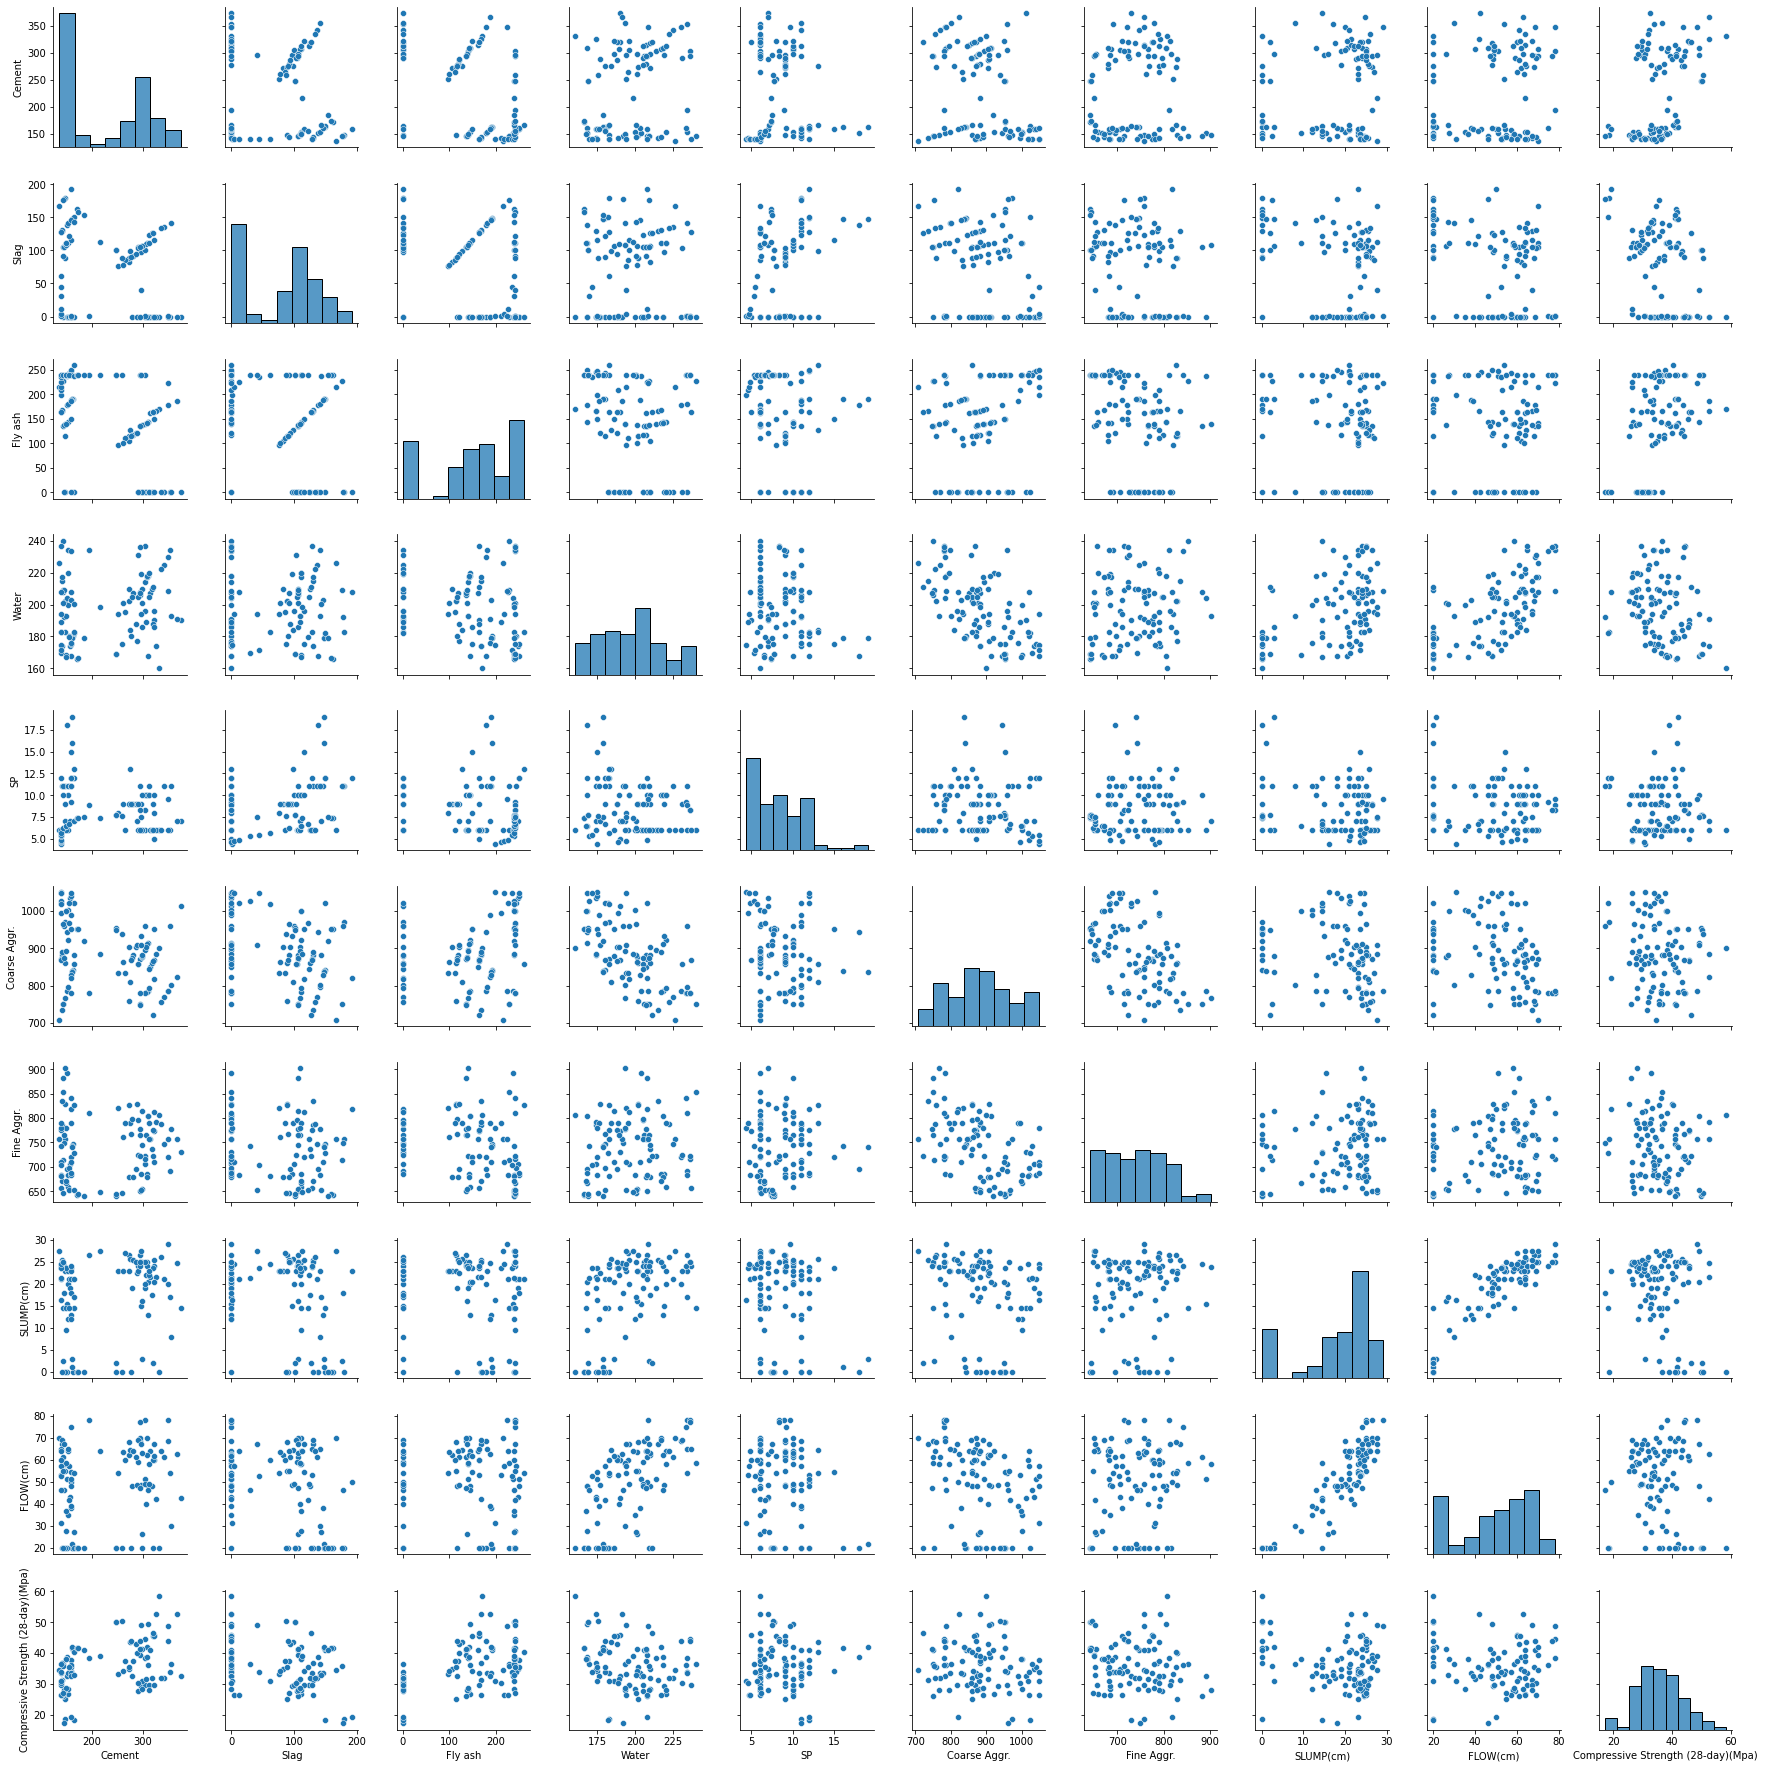

In [ ]:
sns.pairplot(df);

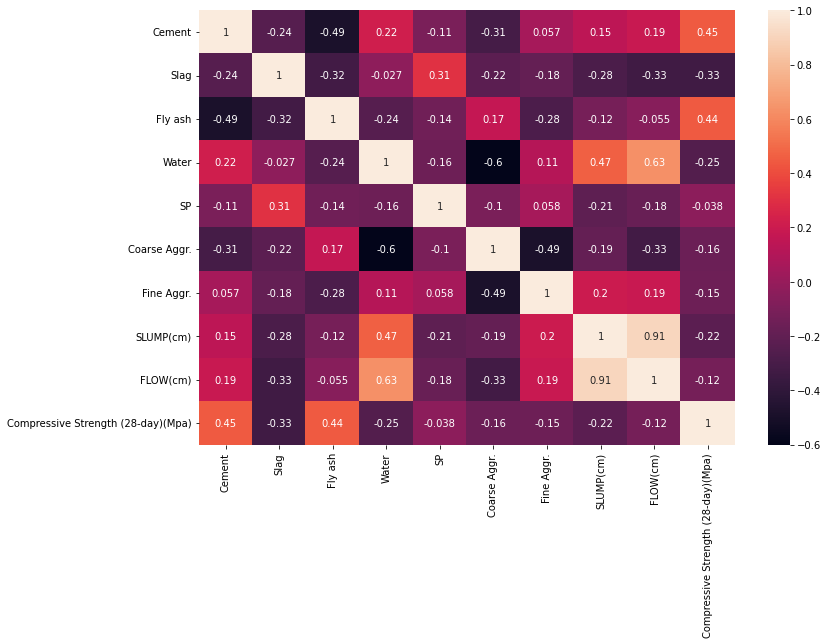

In [ ]:
sns.heatmap(df.corr(), annot=True)

### **Splitting data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns ="Compressive Strength (28-day)(Mpa)") 
y = df["Compressive Strength (28-day)(Mpa)"]

In [ ]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [ ]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42) 

In [ ]:
df.sample(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
34,137.000,167.000,214.000,226.000,6.000,708.000,757.000,27.500,70.000,34.450
69,336.000,134.000,0.000,222.000,6.000,756.000,787.000,26.000,64.000,31.900
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000,46.360
22,148.000,180.000,0.000,183.000,11.000,972.000,757.000,0.000,20.000,18.520
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000,28.030
77,261.000,78.000,100.000,201.000,9.000,864.000,761.000,23.000,63.500,34.180
56,307.000,110.000,0.000,189.000,10.000,904.000,765.000,22.000,40.000,31.500
36,252.000,76.000,97.000,194.000,8.000,835.000,821.000,23.000,54.000,33.110
64,265.000,86.000,111.000,195.000,6.000,833.000,790.000,27.000,60.000,37.390
96,215.600,112.900,239.000,198.700,7.400,884.000,649.100,27.500,64.000,39.130


In [ ]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (72, 9)
Train target shape   :  (72,)
Test features shape  :  (31, 9)
Test target shape    :  (31,)


In [ ]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
11,148.000,109.000,139.000,193.000,7.000,768.000,902.000,23.750,58.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000
55,159.000,193.000,0.000,208.000,12.000,821.000,818.000,23.000,50.000
28,298.000,107.000,137.000,201.000,6.000,878.000,655.000,16.000,26.000
64,265.000,86.000,111.000,195.000,6.000,833.000,790.000,27.000,60.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


In [ ]:
X_test

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
30,321.000,0.000,164.000,190.000,5.000,870.000,774.000,24.000,60.000
67,166.000,0.000,260.000,183.000,13.000,859.000,827.000,21.000,54.000
62,299.000,107.000,0.000,210.000,10.000,881.000,745.000,25.000,63.000
47,287.000,94.000,121.000,188.000,9.000,904.000,696.000,25.000,61.000
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000
40,145.000,177.000,227.000,209.000,11.000,752.000,715.000,2.500,20.000
90,155.400,122.100,240.000,179.900,6.700,966.800,652.500,14.500,41.500
45,318.000,126.000,0.000,210.000,6.000,861.000,737.000,17.500,48.000
10,145.000,106.000,136.000,208.000,10.000,751.000,883.000,24.500,61.000
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000


## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train) 

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.01867817e+00,  4.89060387e-01, -7.01085388e-02,
        -1.99267756e-01, -5.39878038e-01, -1.37532719e+00,
         2.52572977e+00,  6.48505379e-01,  4.82444362e-01],
       [ 8.52113706e-01, -6.26114653e-01,  1.06779252e+00,
        -1.50862633e-01, -3.67117066e-01,  2.75612237e-01,
        -1.40263561e+00,  1.08244950e+00,  9.92185022e-01],
       [-8.80658652e-01,  1.86460669e+00, -1.63768284e+00,
         5.26809088e-01,  1.18773168e+00, -7.54320879e-01,
         1.20685410e+00,  5.61716555e-01,  2.93415534e-02],
       [ 8.63406212e-01,  4.56309284e-01, -9.26635646e-02,
         1.87973228e-01, -8.85399982e-01, -8.64461622e-02,
        -1.35239273e+00, -2.48312469e-01, -1.32996687e+00],
       [ 4.49347647e-01,  1.12422708e-01, -3.85878901e-01,
        -1.02457510e-01, -8.85399982e-01, -6.13715675e-01,
         7.67228879e-01,  1.02459028e+00,  5.95720064e-01],
       [-1.03122540e+00,  1.61549362e-01, -3.40768849e-01,
         2.36378351e-01,  1.51165851e-01, -2.973539

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.15199248, -1.2958747 ,  0.21182928, -0.34448313, -1.23092193,
        -0.18018296,  0.51601447,  0.67743499,  0.59572006],
       [-0.79282805, -1.2958747 ,  1.29447053, -0.68331899,  1.53325363,
        -0.30907107,  1.34816221,  0.33027969,  0.25589296],
       [ 0.87595344,  0.45630928, -1.63768284,  0.62361933,  0.49668779,
        -0.05129486,  0.06068834,  0.79315342,  0.76563362],
       [ 0.72538669,  0.24342712, -0.27310377, -0.44129337,  0.15116585,
         0.21819845, -0.7086558 ,  0.79315342,  0.65235792],
       [-0.86811142,  1.09495578,  0.4824896 ,  0.28478347,  0.84220974,
        -0.66058408, -0.48884319, -0.59546776, -0.65031266],
       [-1.05631986,  1.60259787,  0.9223126 ,  0.57521421,  0.84220974,
        -1.5628008 , -0.41033868, -1.8105113 , -1.66979398],
       [-0.92582868,  0.70358011,  1.06892027, -0.83337487, -0.64353462,
         0.95403234, -1.39164498, -0.42189012, -0.45208018],
       [ 1.1143508 ,  0.76744476, -1.63768284,  0.62361933, -0

##  **1. Model Building (Linear Regression)**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


### **1.1 Interpret the model**

### **1.2 Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [ ]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: -957143.9727935869
MAE 		: 7317.808656545503
MSE 		: 53941992.73292928
RMSE 		: 7344.521273230086


In [ ]:
y_train_pred = lm.predict(X_train)

In [ ]:
eval_metric(y_train, y_train_pred)

Model performance:
--------------------------
R2_score 	: -886613.3046055669
MAE 		: 7420.976635938477
MSE 		: 55380497.08974399
RMSE 		: 7441.807380585981


# **2. Regularization**

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [ ]:
scores

{'fit_time': array([0.00924206, 0.0018611 , 0.00178051, 0.00162458, 0.00160742]),
 'score_time': array([0.00225115, 0.00204706, 0.00191474, 0.00192428, 0.00189281]),
 'test_neg_mean_absolute_error': array([-2.26258085, -2.24094427, -1.56978316, -2.50999046, -2.34599774]),
 'test_neg_mean_squared_error': array([ -7.10315382,  -9.75375658,  -3.28352853, -10.98491871,
         -7.69547713]),
 'test_neg_root_mean_squared_error': array([-2.66517426, -3.12310048, -1.81205092, -3.31435042, -2.7740723 ]),
 'test_r2': array([0.87036886, 0.71883703, 0.93480107, 0.88567151, 0.87970636])}

In [ ]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.009,0.002,0.870,-2.263,-7.103,-2.665
2,0.002,0.002,0.719,-2.241,-9.754,-3.123
3,0.002,0.002,0.935,-1.570,-3.284,-1.812
4,0.002,0.002,0.886,-2.510,-10.985,-3.314
5,0.002,0.002,0.880,-2.346,-7.695,-2.774


In [ ]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.858
test_neg_mean_absolute_error       -2.186
test_neg_mean_squared_error        -7.764
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


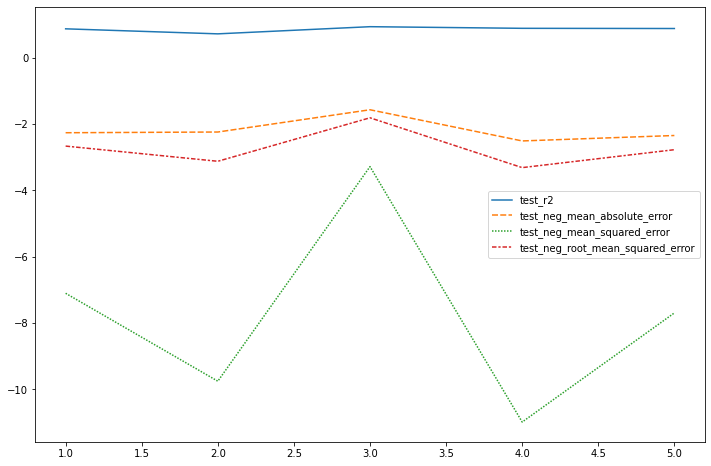

In [ ]:
sns.lineplot(data = scores.iloc[:,2:]);

## **2.1 Ridge (Apply and evaluate)**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)

In [ ]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


In [ ]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.900,0.921,-886613.305,-957143.973
mae,1.992,1.716,7420.977,7317.809
mse,6.237,4.439,55380497.090,53941992.733
rmse,2.497,2.107,7441.807,7344.521


In [ ]:
model = Ridge(alpha=1, random_state=42)


In [ ]:
model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


In [ ]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.900,0.921,0.899,0.922
mae,1.992,1.716,2.003,1.699
mse,6.237,4.439,6.313,4.398
rmse,2.497,2.107,2.513,2.097


In [ ]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.005,0.868,-2.265,-7.211,-2.685
2,0.002,0.003,0.735,-2.206,-9.186,-3.031
3,0.002,0.002,0.932,-1.636,-3.431,-1.852
4,0.002,0.002,0.884,-2.532,-11.117,-3.334
5,0.002,0.002,0.888,-2.392,-7.185,-2.680


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.861
test_neg_mean_absolute_error       -2.206
test_neg_mean_squared_error        -7.626
test_neg_root_mean_squared_error   -2.717
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


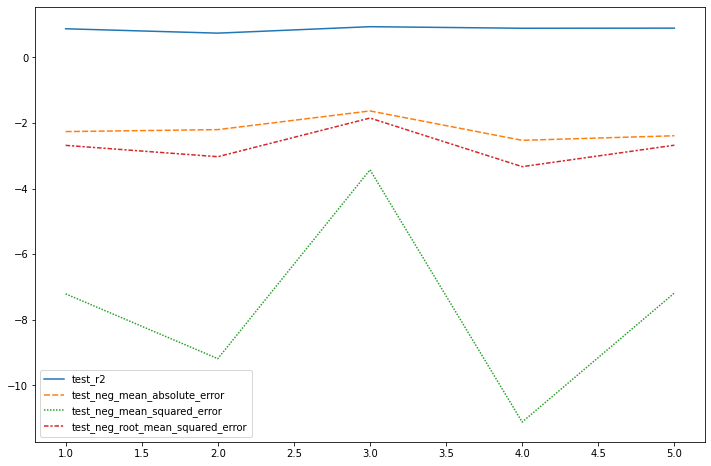

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
ridge_model.coef_

array([ 4.8930977 , -1.53407954,  4.56389199, -3.94753322,  0.13909195,
       -4.08634982, -1.84857226, -2.18856693,  1.18471435])

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

0.42000000000000004

In [ ]:
ridge_cv_model.best_score_

-2.71033689875989

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.900,0.923
mae,1.999,1.694
mse,6.267,4.357
rmse,2.503,2.087


In [ ]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694
mse,6.237,4.439,6.313,4.398,6.267,4.357
rmse,2.497,2.107,2.513,2.097,2.503,2.087


## **2.2 Lasso (Apply and evalute)**

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.768,0.816
mae,3.016,2.588
mse,14.521,10.343
rmse,3.811,3.216


In [ ]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216


In [ ]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.023,0.003,0.710,-3.603,-15.902,-3.988
2,0.003,0.003,0.563,-2.929,-15.160,-3.894
3,0.003,0.002,0.753,-2.865,-12.461,-3.530
4,0.003,0.002,0.725,-3.407,-26.448,-5.143
5,0.003,0.002,0.725,-3.735,-17.608,-4.196


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.695
test_neg_mean_absolute_error        -3.308
test_neg_mean_squared_error        -17.516
test_neg_root_mean_squared_error    -4.150
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.768,0.816
mae,3.016,2.588
mse,14.521,10.343
rmse,3.811,3.216


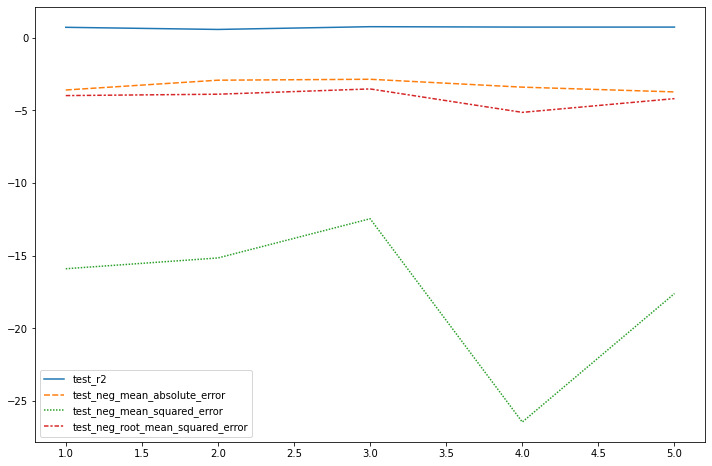

In [ ]:
sns.lineplot(data = scores.iloc[:,2:])

In [ ]:
lasso_model.coef_

array([ 4.77911449, -0.        ,  4.73624652, -0.94768633,  0.        ,
       -0.3896498 ,  0.        , -0.84390603, -0.        ])

In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42) 

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.mse_path_[99].mean()

7.686622513266603

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.923
mae,1.998,1.687
mse,6.259,4.346
rmse,2.502,2.085


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085


In [ ]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [ ]:
lasso_cv_model.coef_

array([ 4.65222827, -1.85625152,  4.25869027, -4.36584994,  0.06133681,
       -4.61690871, -2.22567037, -2.30725482,  1.36182721])

## **2.3 Elastic-Net (Apply and evaluate )**
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.625,0.625
mae,3.870,3.724
mse,23.448,21.153
rmse,4.842,4.599


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923,0.625,0.625
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687,3.870,3.724
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346,23.448,21.153
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085,4.842,4.599


In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.453,-4.722,-29.954,-5.473
2,0.487,-3.011,-17.810,-4.220
3,0.602,-3.774,-20.060,-4.479
4,0.571,-4.595,-41.215,-6.420
5,0.556,-4.806,-28.390,-5.328


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.534
test_neg_mean_absolute_error        -4.182
test_neg_mean_squared_error        -27.486
test_neg_root_mean_squared_error    -5.184
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.625,0.625
mae,3.870,3.724
mse,23.448,21.153
rmse,4.842,4.599


In [ ]:
elastic_model.coef_

array([ 2.5541165 , -0.78115849,  2.52484606, -1.32616694,  0.        ,
       -1.0662595 , -0.18500563, -0.94691219, -0.        ])

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [ ]:
elastic_cv_model.alpha_

0.01

In [ ]:
elastic_cv_model.l1_ratio_

0.1

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [ ]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923,0.625,0.625,0.899,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687,3.870,3.724,2.001,1.693
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346,23.448,21.153,6.287,4.367
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085,4.842,4.599,2.507,2.090


In [ ]:
elastic_cv_model.coef_

array([ 4.84135583, -1.61564957,  4.49156818, -4.07924648,  0.11794245,
       -4.23528863, -1.95382538, -2.24896485,  1.27117365])

In [ ]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005,0.003,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.652,-3.060,-1.837,-3.328,-2.678,-2.711,0.504,1
1,0.003,0.001,0.001,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.642,-3.073,-1.832,-3.335,-2.680,-2.713,0.510,3
2,0.003,0.000,0.001,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.640,-3.080,-1.831,-3.342,-2.682,-2.715,0.513,5
3,0.003,0.000,0.001,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.640,-3.089,-1.831,-3.352,-2.684,-2.719,0.517,7
4,0.003,0.000,0.001,0.001,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.642,-3.091,-1.831,-3.354,-2.684,-2.720,0.517,9
5,0.003,0.000,0.001,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.644,-3.094,-1.832,-3.357,-2.684,-2.722,0.518,11
6,0.003,0.000,0.001,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.645,-3.094,-1.832,-3.358,-2.685,-2.723,0.518,12
7,0.003,0.000,0.001,0.001,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.658,-3.053,-1.840,-3.330,-2.678,-2.712,0.502,2
8,0.004,0.002,0.001,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.646,-3.068,-1.834,-3.338,-2.679,-2.713,0.509,4
9,0.003,0.000,0.001,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.641,-3.076,-1.833,-3.345,-2.681,-2.715,0.512,6


In [ ]:
grid_model.best_index_

0

In [ ]:
grid_model.best_index_

0

In [ ]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090
